### Bishop’s University
### CS 590 – Master’s Project
Designing a New Recurrent Neural Network Architecture for Hate Speech Recognition in Tweets


Team member names:
Mabline Andrea – m23@ubishops.ca

Shweta Salian – ssalian23@ubishops.ca

Sai Raghava Mallik Vaddipati – svaddipati23@ubishops.ca

In [1]:
#Performing Twitter Hate Speech Recognition using LSTM(Long Short Term Model)

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import re


In [3]:
#Loading the Sentiment 140 dataset
data = pd.read_csv('/Users/Andrea/Desktop/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']


In [4]:
data.head(50)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
data.tail(150)

,target,ids,date,flag,user,text
1599850,4,2193552448,Tue Jun 16 08:36:46 PDT 2009,NO_QUERY,jenniehager,"sick, sick, sick today, but still fingers cros..."
1599851,4,2193552454,Tue Jun 16 08:36:46 PDT 2009,NO_QUERY,YessicaCarcamo,Getting ready to go out I have to go to mac ...
1599852,4,2193552500,Tue Jun 16 08:36:47 PDT 2009,NO_QUERY,afarley08,loves visitors so if you are goin to the Aeros...
1599853,4,2193552501,Tue Jun 16 08:36:47 PDT 2009,NO_QUERY,Jay_Cousins,"Nice out, but If I am going to leave here at 6..."
1599854,4,2193552510,Tue Jun 16 08:36:47 PDT 2009,NO_QUERY,laughingstars,@WillaRyan At least trees are being spared.
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
data.shape

(1600000, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
data = data[['target', 'text']]

#Target values mapped to binary (0 = negative, 1 = positive)
#Ignore the neutral tweets (target = 2)
data = data[data['target'] != 2]
data['target'] = data['target'].map({0: 0, 4: 1})


stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  #Remove URLs
    text = re.sub(r'@\w+', '', text)     #Remove mentions
    text = re.sub(r'#', '', text)        #Remove hashtags
    text = re.sub(r'\d+', '', text)      #Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  #Remove punctuation
    text = text.lower()                  #Lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['cleaned_text'] = data['text'].apply(preprocess_text)

In [9]:
#Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])


In [10]:
#Pad the sequences
padded_sequences = pad_sequences(sequences, padding='post', maxlen=50)


In [11]:
#Spitting the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['target'], test_size=0.2, random_state=42)


In [12]:
#Building the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=50))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


#Compliling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



#Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40000/40000 ━━━━━━━━━━━━━━━━━━━━ 726s 18ms/step - accuracy: 0.4997 - loss: 0.6933 - val_accuracy: 0.4984 - val_loss: 0.6933
Epoch 2/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 707s 18ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.5016 - val_loss: 0.6932
Epoch 3/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 727s 18ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4984 - val_loss: 0.6932
Epoch 4/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 732s 18ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.4984 - val_loss: 0.6932
Epoch 5/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 3283s 82ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.4984 - val_loss: 0.6932


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 50, 64)           │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (32, 50, 64)           │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 50, 64)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (32, 64)               │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,118,341 (8.08 MB)

 Trainable params: 706,113 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,412,228 (5.39 MB)

In [14]:
#Evaluating the model
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
print('Accuracy:', accuracy_score(y_test, predictions))

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5366s 537ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    159494
           1       0.00      0.00      0.00    160506

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000

Accuracy: 0.49841875


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#Performing Hate Speech Recognition in tweets using GRU 

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import re



In [17]:
#Loading the Sentiment140 dataset
data = pd.read_csv('/Users/Andrea/Desktop/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']


data = data[['target', 'text']]



In [18]:
#Target values mapped to binary (0 = negative, 1 = positive)
#Ignore the neutral tweets (target = 2)
data = data[data['target'] != 2]
data['target'] = data['target'].map({0: 0, 4: 1})


stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  #Remove URLs
    text = re.sub(r'@\w+', '', text)     #Remove mentions
    text = re.sub(r'#', '', text)        #Remove hashtags
    text = re.sub(r'\d+', '', text)      #Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  #Remove punctuation
    text = text.lower()                  #Lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['cleaned_text'] = data['text'].apply(preprocess_text)


In [19]:
#Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])

#Pad the sequences
padded_sequences = pad_sequences(sequences, padding='post', maxlen=50)


In [20]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['target'], test_size=0.2, random_state=42)


In [21]:
#Building the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=50))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
#Complie the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
#Training the model
history_1 = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=42)


Epoch 1/5
30477/30477 ━━━━━━━━━━━━━━━━━━━━ 696s 23ms/step - accuracy: 0.5003 - loss: 0.6934 - val_accuracy: 0.4984 - val_loss: 0.6932
Epoch 2/5
30477/30477 ━━━━━━━━━━━━━━━━━━━━ 704s 23ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.4984 - val_loss: 0.6932
Epoch 3/5
30477/30477 ━━━━━━━━━━━━━━━━━━━━ 708s 23ms/step - accuracy: 0.5102 - loss: 0.6889 - val_accuracy: 0.7768 - val_loss: 0.4692
Epoch 4/5
30477/30477 ━━━━━━━━━━━━━━━━━━━━ 714s 23ms/step - accuracy: 0.7821 - loss: 0.4604 - val_accuracy: 0.7917 - val_loss: 0.4411
Epoch 5/5
30477/30477 ━━━━━━━━━━━━━━━━━━━━ 716s 23ms/step - accuracy: 0.7987 - loss: 0.4312 - val_accuracy: 0.7956 - val_loss: 0.4351


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 64)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 50, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,069,957 (7.90 MB)

 Trainable params: 689,985 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,379,972 (5.26 MB)

In [25]:
#Evaluating the model
predictions_1 = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions_1))
print('Accuracy:', accuracy_score(y_test, predictions_1))


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step
              precision    recall  f1-score   support

           0       0.81      0.78      0.79    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Accuracy: 0.7956375


In [26]:
#Implementation of Bi-LSTM, Bi-GRU, LSTM Layer for classification of Sentiment 140 dataset for analysis

In [27]:
from tensorflow.keras.layers import BatchNormalization, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import re

#Build the model
model = Sequential()

#Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=50))

#First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

#Second Bidirectional GRU layer
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

#Third LSTM layer
model.add(LSTM(64))
model.add(Dropout(0.3))

#Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
#Train the model
history_2 = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)


model.summary()

#Evaluate the model
predictions_3 = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions_3))
print('Accuracy:', accuracy_score(y_test, predictions_3))


Epoch 1/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 5752s 144ms/step - accuracy: 0.5004 - loss: 0.6937 - val_accuracy: 0.5016 - val_loss: 0.6931
Epoch 2/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 2809s 70ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.4984 - val_loss: 0.6933
Epoch 3/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 2512s 63ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.4984 - val_loss: 0.6932
Epoch 4/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 2496s 62ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.4984 - val_loss: 0.6932
Epoch 5/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 2492s 62ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.4984 - val_loss: 0.6932


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (32, 50, 128)          │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (32, 50, 128)          │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (32, 50, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 50, 128)          │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (32, 50, 128)          │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (32, 50, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 50, 128)          │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,510,405 (17.21 MB)

 Trainable params: 1,503,297 (5.73 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 3,006,596 (11.47 MB)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 155s 15ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    159494
           1       0.00      0.00      0.00    160506

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000

Accuracy: 0.49841875


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Implementation of Bi-LSTM , Bi-GRU and Bi-Lstm layer for the classification of tweets in Sentiment 140 dataset


In [30]:
from tensorflow.keras.layers import BatchNormalization, Bidirectional

#Build the model
model = Sequential()

#Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=50))

#First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

#Second Bidirectional GRU layer
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

#Third Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))

#Dense layer for binary classification, activation function is sigmoid
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
#Training the model
history_3 = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)


model.summary()

#Evaluate the model
predictions_4 = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions_4))
print('Accuracy:', accuracy_score(y_test, predictions_4))


Epoch 1/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 2899s 72ms/step - accuracy: 0.7664 - loss: 0.4842 - val_accuracy: 0.7906 - val_loss: 0.4463
Epoch 2/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 2904s 73ms/step - accuracy: 0.7963 - loss: 0.4370 - val_accuracy: 0.7944 - val_loss: 0.4406
Epoch 3/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 3843s 96ms/step - accuracy: 0.8035 - loss: 0.4237 - val_accuracy: 0.7955 - val_loss: 0.4374
Epoch 4/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 4581s 115ms/step - accuracy: 0.8069 - loss: 0.4174 - val_accuracy: 0.7963 - val_loss: 0.4379
Epoch 5/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 2950s 74ms/step - accuracy: 0.8097 - loss: 0.4132 - val_accuracy: 0.7944 - val_loss: 0.4390


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (32, 50, 128)          │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (32, 50, 128)          │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (32, 50, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (32, 50, 128)          │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (32, 50, 128)          │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (32, 50, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (32, 50, 128)          │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (32, 128)              │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 1)                │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,658,821 (17.77 MB)

 Trainable params: 1,552,769 (5.92 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 3,105,540 (11.85 MB)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 186s 19ms/step
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

Accuracy: 0.794375


In [32]:
#Implentation of Bi-LSTM and Bi-GRU model for the sentiment 140 dataset

In [33]:
from tensorflow.keras.layers import BatchNormalization, Bidirectional


In [34]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=50))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(128)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
#Training the model
history_4 = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)


model.summary()

#Evaluate the model
predictions_5 = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions_5))
print('Accuracy:', accuracy_score(y_test, predictions_5))



Epoch 1/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 4405s 110ms/step - accuracy: 0.7692 - loss: 0.4763 - val_accuracy: 0.7942 - val_loss: 0.4390
Epoch 2/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 4131s 103ms/step - accuracy: 0.8020 - loss: 0.4251 - val_accuracy: 0.7990 - val_loss: 0.4300
Epoch 3/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 3982s 100ms/step - accuracy: 0.8120 - loss: 0.4085 - val_accuracy: 0.8000 - val_loss: 0.4315
Epoch 4/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 8334s 208ms/step - accuracy: 0.8180 - loss: 0.3979 - val_accuracy: 0.7836 - val_loss: 0.4523
Epoch 5/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 11454s 286ms/step - accuracy: 0.8105 - loss: 0.4105 - val_accuracy: 0.7927 - val_loss: 0.4436


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (32, 50, 128)          │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (32, 50, 256)          │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (32, 50, 256)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (32, 256)              │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 1)                │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,359,621 (35.70 MB)

 Trainable params: 3,119,873 (11.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,239,748 (23.80 MB)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 241s 24ms/step
              precision    recall  f1-score   support

           0       0.79      0.80      0.79    159494
           1       0.80      0.78      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

Accuracy: 0.792653125


In [81]:
#Implentation of LSTM on the Davidson Dataset

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Loading the Davidson Dataset
data = pd.read_csv('/Users/Andrea/Desktop/Davidson Dataset.csv')


print(data.head())



   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [83]:
data.shape

(24783, 7)

#Class Labels 
0 - hate speech
1 - offensive language
2- neither


In [84]:
data.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [85]:
#Selecting the tweet and class column
data = data[['tweet', 'class']]

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


data['tweet'] = data['tweet'].apply(preprocess_text)


label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['class'], test_size=0.2, random_state=42)

#Tokenize the text
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

#Pad the sequences
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')


In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

#Build the model
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

#Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))


Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


310/310 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.7632 - loss: 0.6863 - val_accuracy: 0.7730 - val_loss: 0.6656
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 36s 117ms/step - accuracy: 0.7783 - loss: 0.6602 - val_accuracy: 0.7730 - val_loss: 0.6680
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 37s 120ms/step - accuracy: 0.7719 - loss: 0.6694 - val_accuracy: 0.7730 - val_loss: 0.6651
Epoch 4/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 35s 114ms/step - accuracy: 0.7776 - loss: 0.6611 - val_accuracy: 0.7730 - val_loss: 0.6656
Epoch 5/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.7726 - loss: 0.6697 - val_accuracy: 0.7730 - val_loss: 0.6665


In [87]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,470,667 (32.31 MB)

 Trainable params: 2,823,555 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,647,112 (21.54 MB)

In [88]:
#Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')


155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7743 - loss: 0.6673
Test Accuracy: 77.30%


In [44]:
#Implementating GRU model on the Davidson twitter dataset

In [45]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

#Loading the dataset 
data = pd.read_csv('/Users/Andrea/Desktop/Davidson Dataset.csv')


#Using only the tweet and the class column
data = data[['tweet', 'class']]

#Performing preprocessing 
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


data['tweet'] = data['tweet'].apply(preprocess_text)


label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])


In [46]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['class'], test_size=0.2, random_state=42)

#Tokenize the text  
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

#Padding the sequences
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

#Building the GRU model 
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=max_length))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(128))
model.add(Dense(3, activation='softmax'))



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [47]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))



Epoch 1/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 40s 125ms/step - accuracy: 0.7735 - loss: 0.6877 - val_accuracy: 0.7730 - val_loss: 0.6652
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.7807 - loss: 0.6530 - val_accuracy: 0.7730 - val_loss: 0.6658
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 44s 144ms/step - accuracy: 0.7691 - loss: 0.6759 - val_accuracy: 0.7730 - val_loss: 0.6678
Epoch 4/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.7754 - loss: 0.6647 - val_accuracy: 0.7730 - val_loss: 0.6657
Epoch 5/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 43s 140ms/step - accuracy: 0.7747 - loss: 0.6617 - val_accuracy: 0.7730 - val_loss: 0.6698


In [48]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 100, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,275,595 (31.57 MB)

 Trainable params: 2,758,531 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,517,064 (21.05 MB)

In [49]:
#Evaluating the model
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print(f'Test Accuracy: {accuracy}')

155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7743 - loss: 0.6706
Test Accuracy: 0.7730482220649719


In [50]:
#The below code shows the step by step procedure to implement Bi-directional LSTM and Bi-directional GRU for the Davidson twitter dataset

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [52]:
#Loading the dataset
df = pd.read_csv('/Users/Andrea/Desktop/Davidson Dataset.csv')

In [53]:
#Selecting the tweet and class columns
df= df[['tweet', 'class']]


In [54]:
df.head(5)

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [55]:
print(data.head())


                                               tweet  class
0  rt mayasolovely as a woman you shouldnt compla...      2
1  rt mleew17 boy dats coldtyga dwn bad for cuffi...      1
2  rt urkindofbrand dawg rt 80sbaby4life you ever...      1
3     rt cganderson vivabased she look like a tranny      1
4  rt shenikaroberts the shit you hear about me m...      1


In [56]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])


In [57]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['class'], test_size=0.2, random_state=42)


In [58]:
#Tokenize the text
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)


In [59]:
#Pad the sequences
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')


In [60]:
#Using the Bi-LSTM and Bi-GRU model for the analysis of twitter hate speech recognition.

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense, Dropout


In [62]:
#Defining the Bi-LSTM and Bi-GRU model
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(128)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [63]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [64]:
#Training the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))



Epoch 1/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 76s 241ms/step - accuracy: 0.8231 - loss: 0.5061 - val_accuracy: 0.9024 - val_loss: 0.2858
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 87s 281ms/step - accuracy: 0.9276 - loss: 0.2166 - val_accuracy: 0.8947 - val_loss: 0.3138
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 87s 280ms/step - accuracy: 0.9573 - loss: 0.1237 - val_accuracy: 0.8933 - val_loss: 0.3579
Epoch 4/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 86s 278ms/step - accuracy: 0.9754 - loss: 0.0717 - val_accuracy: 0.8804 - val_loss: 0.5300
Epoch 5/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 87s 280ms/step - accuracy: 0.9851 - loss: 0.0473 - val_accuracy: 0.8759 - val_loss: 0.5109


In [65]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 100, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 256)            │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,361,163 (35.71 MB)

 Trainable params: 3,120,387 (11.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,240,776 (23.81 MB)

In [66]:
#Evaluating the model on test set 
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')


155/155 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8785 - loss: 0.5171
Test Accuracy: 87.59%


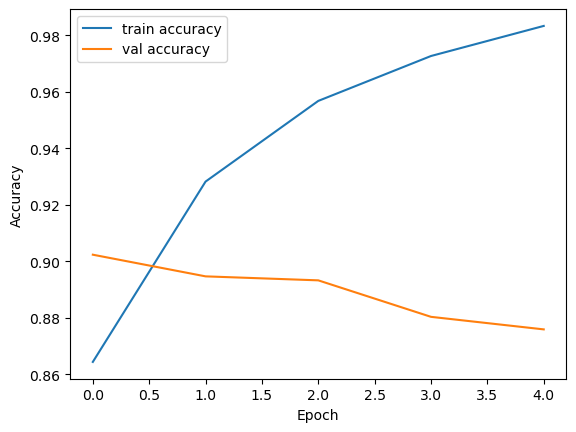

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [68]:
#This part of the code below has batch size = 32 and length if the tweet = 25


In [69]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

In [70]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['class'], test_size=0.2, random_state=42)


In [71]:
#Tokenize the text
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [72]:
#Pad the sequences
max_length = 25
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')


In [73]:
#Using the Bi-LSTM and Bi-GRU model for the analysis of twitter hate speech recognition.

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense, Dropout


In [75]:
#Define the Bi-LSTM and Bi-GRU model
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(128)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [76]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
#Training the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))



Epoch 1/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.8379 - loss: 0.4772 - val_accuracy: 0.9032 - val_loss: 0.2810
Epoch 2/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.9334 - loss: 0.1982 - val_accuracy: 0.8927 - val_loss: 0.2988
Epoch 3/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9636 - loss: 0.1115 - val_accuracy: 0.8723 - val_loss: 0.4364
Epoch 4/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - accuracy: 0.9777 - loss: 0.0671 - val_accuracy: 0.8848 - val_loss: 0.4227
Epoch 5/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.9850 - loss: 0.0453 - val_accuracy: 0.8769 - val_loss: 0.5011


In [78]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 25, 128)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 25, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 25, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 256)            │       296,448 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,361,163 (35.71 MB)

 Trainable params: 3,120,387 (11.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,240,776 (23.81 MB)

In [79]:
#Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8784 - loss: 0.5116
Test Accuracy: 87.69%


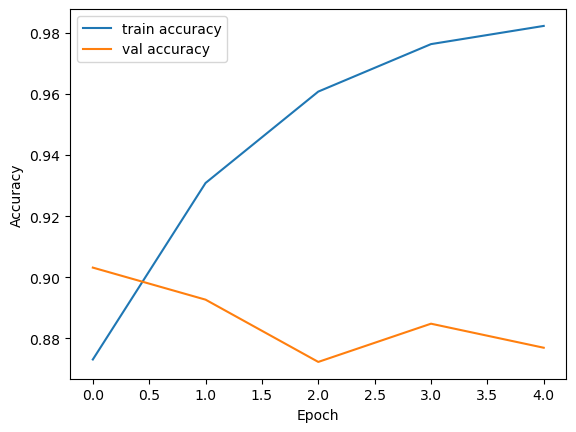

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
